# Airbnb Investment in Melbourne, Australia

### Smart property investment using data science and machine learning

#### Applied Data Science Capstone Project by IBM/Coursera

##### 19/01/2020


## Table of contents
* [Introduction : Business problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results & Discussion](#results)
* [Conclusion](#conclusion)

## Introduction : Business problem <a name="introduction"></a>

**Airbnb** has become one of the biggest players in the world's holiday accommodation industry. It exists in **more than 65,000 cities across 190+ countries all over the world**.

**Infik** published in 2019, the list of the top Airbnb cities, based on **AirDNA** database. The city of Melbourne was number 10 with 19.055 Airbnb Listings.

As the sporting and cultural capital of Australia, Melbourne has so much to offer visitors from all over the world. It is a culturally diverse city offering some of the best living standards throughout Australia.

This is where I decided to capitalize on the short-term rental demand created by Airbnb.

The study is part of 'The Battle of Neighborhoods' Coursera Applied data science capstone project. It concludes the wonderful IBM Data science Professional Certificate set of courses, which I highly recommand to anyone who is into data science and Machine Learning.

My task is to understand the revenue potential of short-term vacation in Melbourne, and explore the performance of specific neighborhoods. 

The main questions will be : 

* Are there any clusters of similar neighborhoods in Melbourne ?
* Where should I invest ? Is there any significant relationship between cluster and housing price ?
* What are the significant caracteristics that allow us to predict the property price ? And what confidence level do we have in our model ?
* Are there any specific features that can help us maximize the rental revenues ?

At the end, I would like to share with ou my insights, being able, to estimate the right price versus the estimated annual rental revenue.

## Data <a name="data"></a>

### Melbourne Housing Market

**Melbourne_housing_FULL** : The dataset was taken from Kaggle. The data was scraped from publicly available results posted every week from **Domain.com.au**. It was cleaned by Tony Pino and last updated in august 2018. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

The features are :
* **_Suburb_**
* **_Address_**
* **_Rooms_**: Number of rooms
* **_Price_**: Price in Australian dollars
* **_Method_**: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.
* **_Type_**: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.
* **_SellerG_**: Real Estate Agent
* **_Date_**: Date sold
* **_Postcode_**
* **_Distance_**: Distance from CBD in Kilometres
* **_Regionname_**: General Region (West, North West, North, North east ...etc)
* **_Propertycount_**: Number of properties that exist in the suburb.
* **_Bedroom2_** : Scraped # of Bedrooms (from different source)
* **_Bathroom_**: Number of Bathrooms
* **_Car_**: Number of carspots
* **_Landsize_**: Land Size in Metres
* **_BuildingArea_**: Building Size in Metres
* **_YearBuilt_**: Year the house was built
* **_CouncilArea_**: Governing council for the area
* **_Lattitude_**
* **_Longtitude_**

The Melbourne Housing dataset has :
* **34857** houses sold,
* across **211** suburbs,
* with an average price of : **$1050173**,
* with **21** features

### Melbourne Airbnb Open Data

**cleansed_listings_dec18** : The dataset was also taken from Kaggle and is originally part of Inside Airbnb. This an independent, non-commercial set of tools and data that allows you to explore how Airbnb is really being used in cities around the world.
The original raw csv file has eighty-four (84) columns, some of which won't be needed for analysis such as host_url, host_about, access, interaction, summary, mainly *strings* describing the listings.

The original raw csv file is quite big and has **eighty-four** (84) columns, some of which won't be needed for analysis such as host_url, host_about, access, interaction, summary, mainly strings describing the listings.

After cleaning the dataset, keeping all relevant features, the Greater Melbourne area had:
* **22,895** listings,
* across **247** suburbs,
* hosted by **14,988** hosts,
* with an average nightly rate at **$148**.
* with **33** features left.

To answer the questions, I propose to generate three new features, for each listing :
* **_occupancy_rate_**
* **_nights_per_year_**
* **_income_per_month_**

based on **_minimum_nights_** , **_price_**, **_number_of_reviews_**, **_first_review_** and **_last_review_**, making some assumptions described later in this project.

### Housing price prediction using scikit learn

The **prediction** part of our project is aimed at **estimating house prices** based on the parameters of the housing dataset.

### import data

In [1]:
import types
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np


housing_clustered = pd.read_csv('housing_clustered.csv')
housing_clustered.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
0,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067,...,Thrift / Vintage Store,Farmers Market,Coffee Shop,Garden,Japanese Restaurant,Burger Joint,Convenience Store,Cultural Center,-37.803706,144.99993
1,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067,...,Thrift / Vintage Store,Farmers Market,Coffee Shop,Garden,Japanese Restaurant,Burger Joint,Convenience Store,Cultural Center,-37.803706,144.99993
2,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3067,...,Thrift / Vintage Store,Farmers Market,Coffee Shop,Garden,Japanese Restaurant,Burger Joint,Convenience Store,Cultural Center,-37.803706,144.99993
3,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,2016-07-05,2.5,3067,...,Thrift / Vintage Store,Farmers Market,Coffee Shop,Garden,Japanese Restaurant,Burger Joint,Convenience Store,Cultural Center,-37.803706,144.99993
4,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,2016-08-10,2.5,3067,...,Thrift / Vintage Store,Farmers Market,Coffee Shop,Garden,Japanese Restaurant,Burger Joint,Convenience Store,Cultural Center,-37.803706,144.99993


In [2]:
print('Number of houses: ', housing_clustered.shape[0])
print('Number of features in dataset: ', housing_clustered.shape[1])
print('Average price at: ${}'.format(round(housing_clustered.Price.mean())))
print('Number of suburbs: ',housing_clustered.Postcode.nunique())

Number of houses:  9875
Number of features in dataset:  35
Average price at: $1104807.0
Number of suburbs:  170


Let us first get some info on our dataset's columns. We would like to keep significant parameters, numerical or categorical.

In [3]:
housing_clustered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9875 entries, 0 to 9874
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Suburb                  9875 non-null   object 
 1   Address                 9875 non-null   object 
 2   Rooms                   9875 non-null   int64  
 3   Type                    9875 non-null   object 
 4   Price                   9875 non-null   float64
 5   Method                  9875 non-null   object 
 6   SellerG                 9875 non-null   object 
 7   Date                    9875 non-null   object 
 8   Distance                9875 non-null   float64
 9   Postcode                9875 non-null   int64  
 10  Bedroom2                9875 non-null   int64  
 11  Bathroom                9875 non-null   int64  
 12  Car                     9875 non-null   int64  
 13  Landsize                9875 non-null   float64
 14  BuildingArea            9875 non-null   

We decided to keep the **Type**, **Cluster Labels**, **Distance**, **Rooms**, **Bathroom**, **Car**, **BuldingArea** and **Landsize** colums along with the **Price** labels we are trying to predict.

In [4]:
housing_df = housing_clustered[['Address','Type', 'Distance', 'Rooms', 'Bathroom', 'Car', 'BuildingArea', 'Landsize', 'Cluster Labels','Price']]
housing_plot = housing_clustered[['Cluster Labels', 'Lattitude' , 'Longtitude','Price']]

In [5]:
housing_pred = housing_df [['Type','Cluster Labels', 'Distance', 'Rooms','Bathroom',
                           'Car','BuildingArea','Landsize','Price']]

In [6]:
housing_pred.head()

,Type,Cluster Labels,Distance,Rooms,Bathroom,Car,BuildingArea,Landsize,Price
0,h,0,2.5,2,1,0,79.0,156.0,1035000.0
1,h,0,2.5,3,2,0,150.0,134.0,1465000.0
2,h,0,2.5,4,1,2,142.0,120.0,1600000.0
3,h,0,2.5,3,2,0,210.0,245.0,1876000.0
4,h,0,2.5,2,1,2,107.0,256.0,1636000.0


I noticed some discrepancy between the price distribution for house type **t** (townhouse) and **h** (house, villa). So instead of keeping the **Type** as a one hot encoded categorical value, I decided to build a model for each type.

In this section I am working on **t** type.

I then prepare the train and test split of the resulting dataframe. (Here I am using the **msk** method, instead of **train_test_split**).

In [7]:
housing_pred = housing_pred[housing_pred["Type"] == 'h']
msk = np.random.rand(len(housing_pred)) < 0.8
housing_train = housing_pred[msk].drop('Price',axis=1)
housing_train_labels = housing_pred[msk]['Price']
housing_test = housing_pred[~msk].drop('Price',axis=1)
housing_test_labels = housing_pred[~msk]['Price']

In [8]:
housing_test.shape

(1443, 8)

In [9]:
housing_test.head(10)

,Type,Cluster Labels,Distance,Rooms,Bathroom,Car,BuildingArea,Landsize
5,h,0,2.5,2,1,2,75.0,220.0
16,h,0,2.5,2,1,0,85.0,147.0
22,h,0,2.5,2,1,0,91.0,162.0
24,h,0,2.5,2,1,0,82.0,182.0
28,h,0,13.5,3,2,1,145.0,0.0
42,h,0,13.5,3,1,2,113.0,971.0
57,h,0,3.3,4,2,1,180.0,153.0
62,h,0,3.3,3,2,2,85.0,0.0
64,h,0,3.3,2,1,0,83.0,141.0
72,h,0,3.3,4,2,1,145.0,183.0


Now let's have a look to the correlations between the **Price** and the different parameters.

In [10]:
corr_matrix = housing_pred[msk].corr()

In [11]:
corr_matrix["Price"].sort_values(ascending=False)

Price             1.000000
BuildingArea      0.453526
Bathroom          0.416755
Rooms             0.346999
Landsize          0.120780
Car               0.116342
Cluster Labels   -0.141477
Distance         -0.397441
Name: Price, dtype: float64

The **BuildingArea** parameter is the most significant one, and explains 0.64 correlation coefficient.

We see that the **Price** increases with the **BuildingArea**, the number of **Bathrooms**, the number of **Cars**, and slightly with the **Landsize**.

It generally decreases with the **Distance** to Melbourne City Center.

The **Cluster Labels** is a categorical parameter, and should not be considered.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1171d5e50>,
      dtype=object)

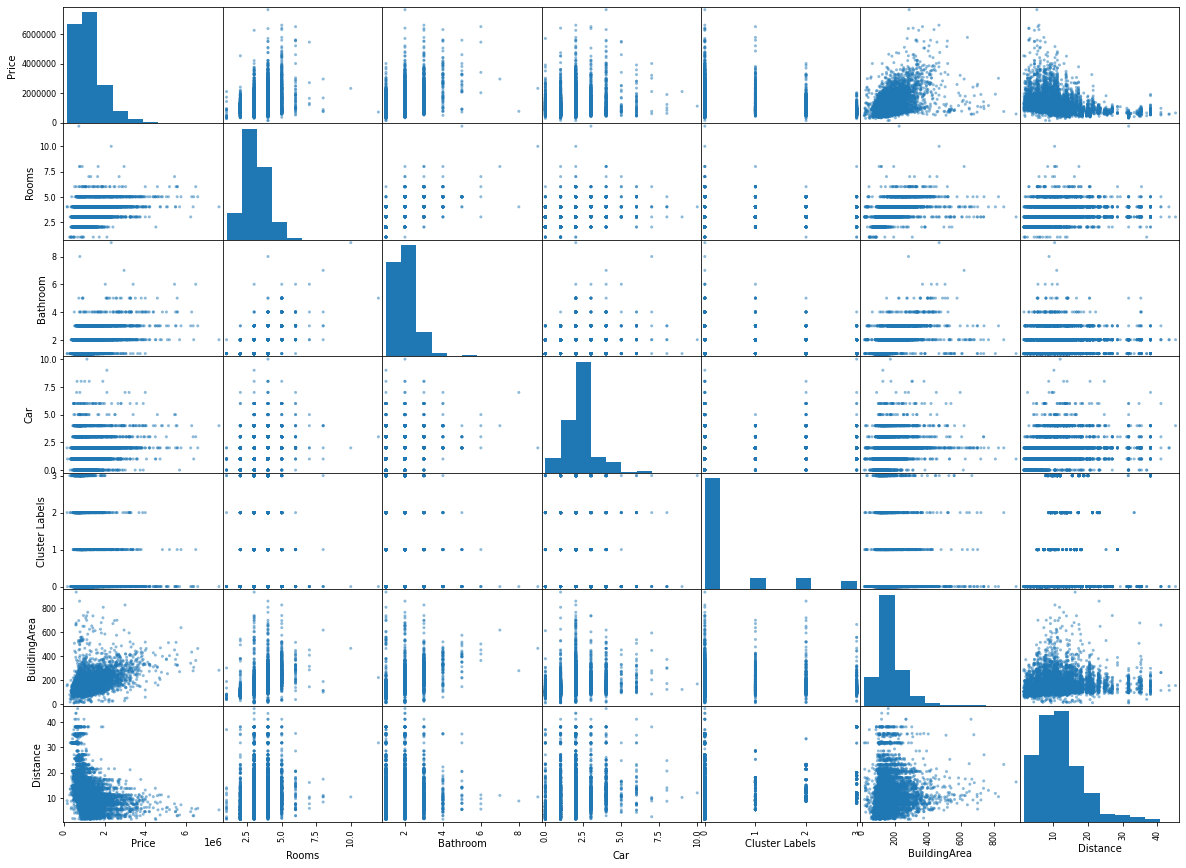

In [12]:
from pandas.plotting import scatter_matrix
attributes = ['Price', 'Rooms', 'Bathroom', 'Car', 'Cluster Labels', 'BuildingArea', 'Distance' ]
scatter_matrix(housing_pred[msk][attributes], figsize=(20,15))

## Data preparation : scaling & one hot encoding

In this section we will prepare the data to further modelling, using pipelines.

A numerical one, scaled using the **StandardScaler** method, and a categorical one for the **Cluster Labels** using **OneHotEncoder**.

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

housing_train_cat = housing_train[['Cluster Labels']]
housing_train_num = housing_train.drop(['Type', 'Cluster Labels'], axis=1)

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
])

housing_train_num_tr = num_pipeline.fit_transform(housing_train_num)

In [14]:
housing_tr = pd.DataFrame(housing_train_num_tr, columns = housing_train_num.columns, index = housing_train_num.index )

In [15]:
housing_train.shape

(5864, 8)

Our training dataframe has **5881** samples.

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(housing_train_num)
cat_attribs = ['Cluster Labels']

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

housing_train_prepared = full_pipeline.fit_transform(housing_train)

## Model short listing

In [17]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

from yellowbrick.regressor import AlphaSelection

/Users/sarahmarsso/Desktop/ml/my_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

I shortlisted a number of models that I would like to try to fit our data :
- **Linear Regression**
- **K Nearest Neighbors**
- **Decision Tree Regressor**
- **Support vector Machines Regressor**
- **Random Forest Regressor**

In [19]:
models = [
    LinearRegression(),
    KNeighborsRegressor(n_neighbors=50),
    DecisionTreeRegressor(),
    SVR(C=1.0, epsilon=0.2),
    RandomForestRegressor(n_estimators=20, max_depth=5)
]

    #Lasso(alpha=1, tol=0.01, max_iter=1000000),
    #Ridge(alpha=62.3, solver="cholesky"),

The function below allows us to cross validate a model, using the K fold cross validation method.

The training set is randomly split in 10 different subsets. The model is evaluated on one subset and trained on the nine others.

The score I chose in this function is the **negative root mean squared error** (negative, so that the score increases when the error decreases). It is in same unit as the target, and has a direct interpretation.

All this, results is an array of 10 different scores. The output of the funciton is then the average of the scores, and the standard deviation.

In [20]:
def score_model(X, y, model, **kwargs):
    # Instantiate the model and visualizer
    model.fit(X, y, **kwargs)
    
    scores = cross_val_score(model, X, y, scoring = "neg_root_mean_squared_error", cv=10)

    print("{}: {} +/- {}".format(model.__class__.__name__, int(np.mean(-scores)), int(np.std(-scores))))

We evaluate our funtion on our array of models :

In [21]:
# Load the regression dataset
X, y = housing_train_prepared, housing_train_labels
    
for model in models :
    score_model(X, y, model)

LinearRegression: 536633 +/- 37170
KNeighborsRegressor: 492058 +/- 46448
DecisionTreeRegressor: 598188 +/- 96489
SVR: 746457 +/- 100849
RandomForestRegressor: 473469 +/- 44552


The first thing to notice, is that the average error is important at this stage for all the models. It may be an indicator of the weakness of the data collected to predict the price...

Anyway, I decided to short list two models for the next step :
- **Linear Regression**
- **Random Forest Regressor**

### Model 1 : Linear Regression

Let us have a look at the Linear Regression learning curve.

For that I will use the **Yellowbrick** library. It extends the Scikit-Learn API to make model selection and hyperparameter tuning easier, using Matplotlib.

In [22]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

from yellowbrick.regressor import AlphaSelection
from yellowbrick.model_selection import LearningCurve

According to the documentation, the learning curve is decribed as below :

The learning curve shows the relationship of the training score versus the cross validated test score for an model with a varying number of training samples. This visualization is typically used to show two things:

- How much the estimator benefits from more data (e.g. do we have “enough data” or will the estimator get better if used in an online fashion).

- If the estimator is more sensitive to error due to variance vs. error due to bias.

When we train the model, the bigger the sample is, the lower the score gets. Overfitting is reduced, and bias increases.

/Users/sarahmarsso/Desktop/ml/my_env/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


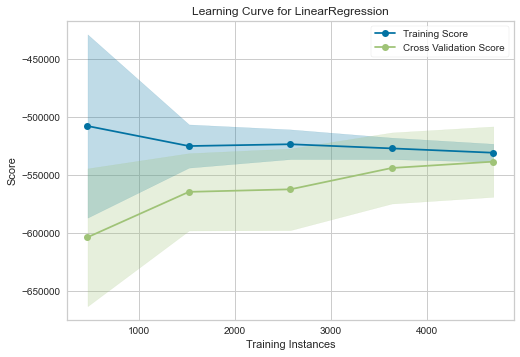

In [23]:
#Instantiate the regression model and visualizer

model=LinearRegression()

visualizer = LearningCurve(model, scoring = "neg_root_mean_squared_error")

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In the case of Linear regression, the training and cross-validation scores converge together as more data is added. **It means that the model will certainly not benefit from more data.**

Let us now trow regularizing our Linear model using Ridge and Lasso regression.

We use the **AlphaSelection** method the find the optimum value of **alpha**.

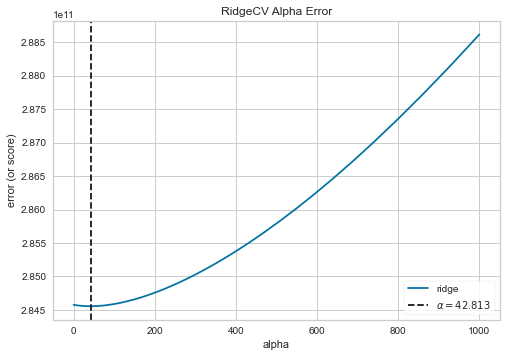

In [24]:
# Create a list of alphas to cross-validate against
alphas = np.logspace(-10, 3, 400)

# Instantiate the linear model and visualizer

model = RidgeCV(alphas = alphas)
visualizer = AlphaSelection(model)
visualizer.fit(X, y)
visualizer.show()

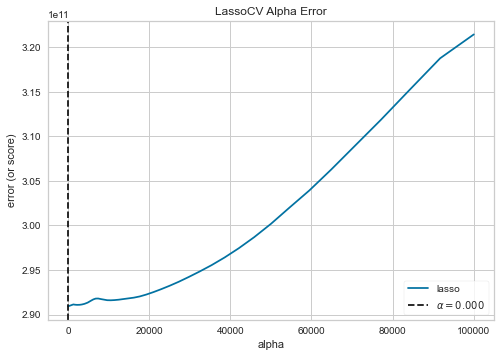

In [25]:
# Create a list of alphas to cross-validate against
alphas = np.logspace(-10, 5, 400)

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alphas, tol=0.2, max_iter=1000000)
visualizer = AlphaSelection(model)
visualizer.fit(X, y)
visualizer.show()

In [26]:
regul = [LinearRegression(),
         Lasso(alpha=13656.467, tol=0.2, max_iter=1000000),
         Ridge(alpha=62.3, solver="cholesky")
        ]

    
for model in regul :
    score_model(X, y, model)

LinearRegression: 536633 +/- 37170
Lasso: 537610 +/- 34821
Ridge: 536364 +/- 37248


We notice that the error is slightly lower for **Ridge** and **Lasso** regularized models.

/Users/sarahmarsso/Desktop/ml/my_env/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


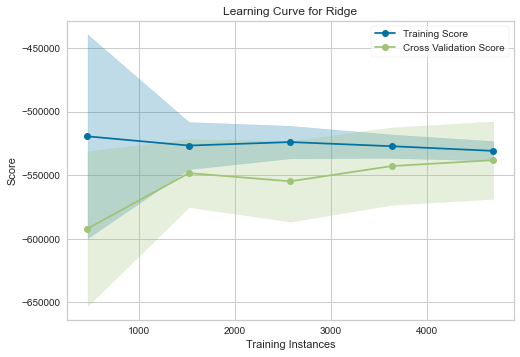

In [27]:
#Instantiate the regression model and visualizer

model=Ridge(alpha=53.620, solver="cholesky")
visualizer = LearningCurve(model, scoring = "neg_root_mean_squared_error")

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

/Users/sarahmarsso/Desktop/ml/my_env/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


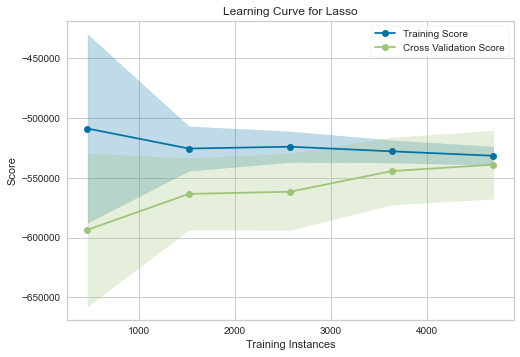

In [28]:
#Instantiate the regression model and visualizer

model=Lasso(alpha=2636.651, tol=0.2, max_iter=1000000)
visualizer = LearningCurve(model, scoring = "neg_root_mean_squared_error")

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In conclusion, we can state that the linear model is weak, with a **root mean squared error** of about **500k$**...

The model is not likely to give use a good estimate of the price, even if we increase the size of the training sample. 

The model needs more parameters, such as size **houshold population**, **household income**, the **number of schools in a 5km area**...

## Model : Random Forest Regression

Let us now look more closly at the **Random Forest Regressor**, which seems to be more promissing.

We begin by tuning the Random Forest Regression model, finding the optimal hyperparameters.

To do so we will use the **GridSearchCV** method from scikit-learn.

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
param_grid =[{'n_estimators': [50, 80, 100], 'max_features':[8, 10]},
             { 'bootstrap': [False], 'n_estimators': [100,150]}]

In [31]:
forest_reg = RandomForestRegressor()

In [32]:
grid_search = GridSearchCV (forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

In [33]:
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [8, 10],
                          'n_estimators': [50, 80, 100]},
                         {'bootstrap': [False], 'n_estimators': [100, 150]}],
             return_train_score=True, scoring='neg_mean_squared_error')

The algorithm will try **3 x 2** combinations for the first dictionnary, and **2** for the second. These tested on **5** cross validation folds. 

Which totals to **40** combinations.

These combinations will be tested regarding the **neg_mean_squared_error** score.

In [34]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 100}

In [35]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8)

The best model is : **RandomForestRegressor(max_features=8, n_estimators=80)**

The score is better compared to the first evaluted **Forest** as shown below.

In [36]:
best_forest_reg = grid_search.best_estimator_

score_model(X, y, best_forest_reg)

RandomForestRegressor: 432210 +/- 50326


In [37]:
score_model(X, y, RandomForestRegressor(n_estimators=20, max_depth=5))

RandomForestRegressor: 473703 +/- 40902


At this stage, we have a better model. We can access the feature importance series, to understand how the price is related to our different features :

In [38]:
feature_importances = best_forest_reg.feature_importances_

In [39]:
feature_importances

array([0.35838547, 0.0368014 , 0.05839059, 0.02726409, 0.35434524,
       0.14001139, 0.01086863, 0.00365015, 0.00318868, 0.00709436])

The related column is missing, so let us have it back sorted by importance :

In [40]:
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attrib = list(cat_encoder.categories_[0])
attributes = num_attribs + cat_one_hot_attrib

In [41]:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3583854704446589, 'Distance'),
 (0.3543452419495927, 'BuildingArea'),
 (0.14001138782943068, 'Landsize'),
 (0.05839059316302691, 'Bathroom'),
 (0.03680140102784879, 'Rooms'),
 (0.027264089966331284, 'Car'),
 (0.010868628181738846, 0),
 (0.007094361143021421, 3),
 (0.003650150460039643, 1),
 (0.003188675834310705, 2)]

As we can see, the distance to Melbourne City Center is the most important feature, followed by the building area, the land size.

Unfortunately the neighborhood clustering does not explain the price, the columns could enventually be removed for a less complex model.

In [42]:
housing_test_prepared = full_pipeline.transform(housing_test)

In [43]:
final_pred = best_forest_reg.predict(housing_test_prepared)

In [44]:
final_mse = mean_squared_error(housing_test_labels, final_pred)
final_rmse = np.sqrt(final_mse)

In [45]:
final_rmse

460677.01431708434

Finally, the model trained on 80% of the data has an error of about **420k$**.

In [46]:
some_data = housing_test.iloc[:10]
some_data_prepared = full_pipeline.transform(some_data)
some_labels = housing_test_labels.iloc[:10]
print("Predictions:", best_forest_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [1128230. 1134000. 1178880. 1163940.  758680.  987255. 2171056. 1324950.
 1205580. 2056970.]
Labels: [1097000.0, 1315000.0, 1180000.0, 1012500.0, 770000.0, 830000.0, 2300000.0, 1370000.0, 1562500.0, 2140000.0]


The predictions are not so far from the truth...

Let us have a look at the model learning curve, to see where we are at :

/Users/sarahmarsso/Desktop/ml/my_env/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


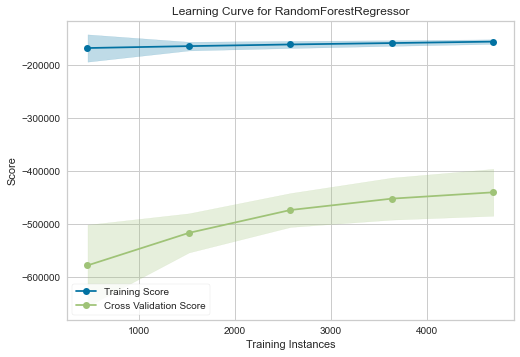

In [47]:
#Instantiate the regression model and visualizer

model = best_forest_reg

visualizer = LearningCurve(model, scoring = "neg_root_mean_squared_error")

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

The same pattern is seen, increasing the number of samples reduces the error. 

We can expect that now that we found our best model, training it on the full dataset, the error will decrease !

Let us do just that.

In [48]:
housing_full = housing_pred.drop('Price',axis=1)
housing_full_labels = housing_pred['Price']

housing_full_prepared = full_pipeline.fit_transform(housing_full)

model_full = RandomForestRegressor(max_features=8, n_estimators=80)

In [49]:
model_full.fit(housing_full_prepared, housing_full_labels)

RandomForestRegressor(max_features=8, n_estimators=80)

In [50]:
final_pred_full = model_full.predict(housing_full_prepared)

In [51]:
final_mse_full = mean_squared_error(housing_full_labels, final_pred_full)
final_rmse_full = np.sqrt(final_mse_full)

In [52]:
final_rmse_full

156546.16039648352

The error is down to **158k$** !

In [53]:
some_data = housing_test.iloc[:20]
some_data_prepared = full_pipeline.transform(some_data)
some_labels = housing_test_labels.iloc[:20]
print("Predictions:", model_full.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [1071312.5        1262593.75       1165706.25       1079956.25
  777272.91666667  857200.         2323625.         1354050.
 1439737.5        2048462.5         940100.         2289468.75
 2041806.25       1040206.25        680550.          806456.25
  919450.95        800506.25       1857150.         1177931.25      ]
Labels: [1097000.0, 1315000.0, 1180000.0, 1012500.0, 770000.0, 830000.0, 2300000.0, 1370000.0, 1562500.0, 2140000.0, 985000.0, 2000000.0, 1900000.0, 1120000.0, 660000.0, 857000.0, 875000.0, 728500.0, 2050000.0, 1435000.0]


In [54]:
from scipy import stats

confidence = 0.95
squared_errors = (final_pred_full - housing_full_labels)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))


array([148234.08338494, 164438.61223201])

Running a t-test, we calculate the 95% confidence interval.

We can say that 95% of the errors made on our prediction will lay between **146** and **164k$**

In [55]:
(np.sqrt(squared_errors)/housing_full_labels).mean()

0.08147553397611866

Also, the average error made by our model is of **8%** which is pretty decent, knowing that the expert error is know to be around **20%**.

The model is ready to be sent to production.

In [56]:
housing_train.columns

Index(['Type', 'Cluster Labels', 'Distance', 'Rooms', 'Bathroom', 'Car',
       'BuildingArea', 'Landsize'],
      dtype='object')

In [57]:
house = pd.DataFrame([["X", 0, 2, 3.4, 1.7, 2, 169.5, 50],
                      ["X", 1, 5, 3, 2, 2, 100, 500],
                      ["X", 2, 5, 3, 2, 2, 100, 500],
                      ["X", 3, 5, 3, 2, 2, 100, 500]]
                     , columns = ['Type', 'Cluster Labels', 'Distance', 'Rooms', 'Bathroom', 'Car', 'BuildingArea', 'Landsize'])

In [58]:
house_prepared = full_pipeline.transform(house)

result = model_full.predict(house_prepared)

In [59]:
result

array([1677589.58333333, 1415318.75      , 1381643.75      ,
       1351212.5       ])

## Appendix : polynomial regression

In [60]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [61]:
X_poly = poly_features.fit_transform(X)

In [62]:
X_poly[0]

array([-1.35324369, -1.6271    , -0.99653082, -1.81498881, -1.06718018,
       -0.758571  ,  1.        ,  0.        ,  0.        ,  0.        ,
        1.83126848,  2.20186281,  1.34854904,  2.45612215,  1.44415484,
        1.02653141, -1.35324369, -0.        , -0.        , -0.        ,
        2.64745442,  1.6214553 ,  2.9531683 ,  1.73640887,  1.23427087,
       -1.6271    , -0.        , -0.        , -0.        ,  0.99307367,
        1.80869229,  1.06347794,  0.75593938, -0.99653082, -0.        ,
       -0.        , -0.        ,  3.29418439,  1.93692008,  1.37679787,
       -1.81498881, -0.        , -0.        , -0.        ,  1.13887353,
        0.80953193, -1.06718018, -0.        , -0.        , -0.        ,
        0.57542996, -0.758571  , -0.        , -0.        , -0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [63]:
score_model(X_poly, y, LinearRegression())
score_model(X_poly, y, Ridge(alpha=149.775, solver="cholesky"))
score_model(X_poly, y, Lasso(alpha=6677, tol=0.2, max_iter=1000000))

LinearRegression: 492516 +/- 53111
Ridge: 489426 +/- 51306
Lasso: 487711 +/- 43481


/Users/sarahmarsso/Desktop/ml/my_env/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


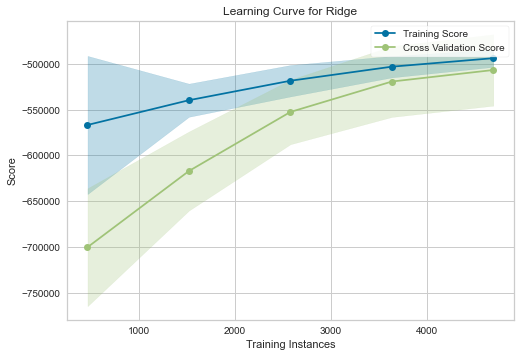

In [64]:
model=Ridge(alpha=1832.98, solver="cholesky")
visualizer = LearningCurve(model, scoring = "neg_root_mean_squared_error")

visualizer.fit(X_poly, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

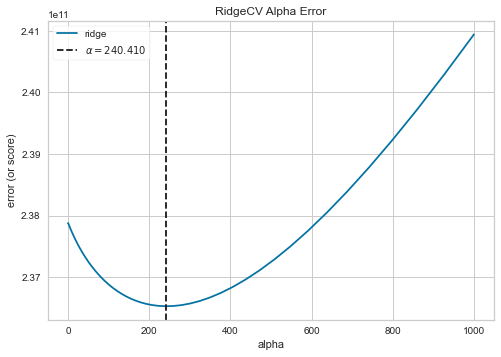

In [65]:
# Create a list of alphas to cross-validate against
alphas = np.logspace(-10, 3, 400)

# Instantiate the linear model and visualizer

model = RidgeCV(alphas = alphas)
visualizer = AlphaSelection(model)
visualizer.fit(X_poly, y)
visualizer.show()

/Users/sarahmarsso/Desktop/ml/my_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 526025525952603.7, tolerance: 496891535939632.25
  tol, rng, random, positive)


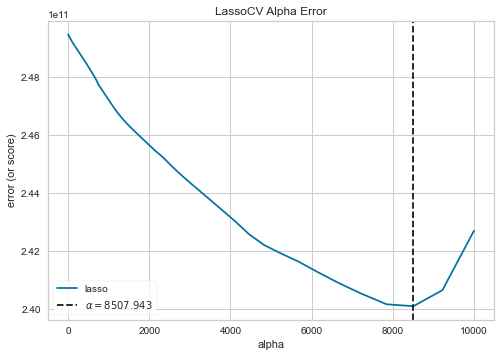

In [66]:
# Create a list of alphas to cross-validate against
alphas = np.logspace(-10, 4, 400)

# Instantiate the linear model and visualizer

model = LassoCV(alphas=alphas, tol=0.2, max_iter=1000000)
visualizer = AlphaSelection(model)
visualizer.fit(X_poly, y)
visualizer.show()